<Axes: xlabel='generated', ylabel='count'>

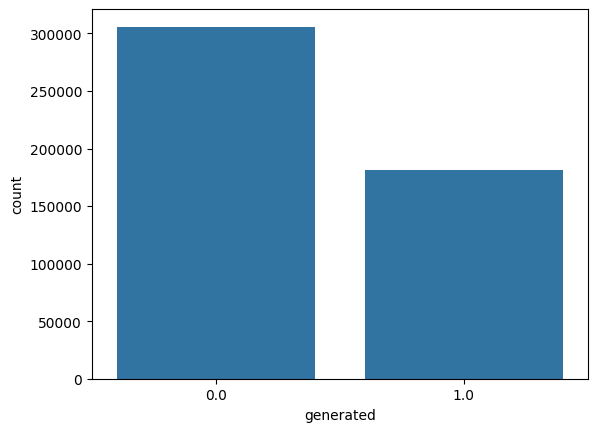

In [4]:
import pandas as pd
import seaborn as sb

training_data = pd.read_csv('./AI_Human.csv/AI_Human.csv')

sb.countplot(data=training_data, x='generated')

In [5]:
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')

    return text


training_data['text'] = training_data['text'].apply(remove_tags)

In [6]:
import string

def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

training_data['text']=training_data['text'].apply(remove_punc)

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

training_data['text']=training_data['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihinc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ihinc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

y = training_data['generated']
X = training_data['text']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=69)

pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     91856
         1.0       0.98      0.90      0.94     54315

    accuracy                           0.96    146171
   macro avg       0.96      0.94      0.95    146171
weighted avg       0.96      0.96      0.96    146171

